# Plot Halo Mergers
Nithun Selva, July 2025

### Import

In [288]:
%matplotlib inline
import os
os.environ['TANGOS_SIMULATION_FOLDER'] = '/home/selvani/MAP/Sims/cptmarvel.cosmo25cmb/cptmarvel.cosmo25cmb.4096g5HbwK1BH/'
# os.environ['TANGOS_DB_CONNECTION'] = '/home/selvani/MAP/Data/Marvel_BN_N10.db'
os.environ['TANGOS_DB_CONNECTION'] = '/home/selvani/MAP/pynbody/Tangos/Marvel_BN_N10.db'
os.chdir('/home/selvani/MAP/pynbody/AnnaWright_startrace/')

import pynbody
import numpy as np
import h5py
import math
import tangos as db
import matplotlib.pyplot as plt
import glob
from pynbody.array import SimArray
import IonUtils
import pandas as pd
import tqdm.auto as tqdm

In [289]:
simpath = '/home/selvani/MAP/Sims/cptmarvel.cosmo25cmb/cptmarvel.cosmo25cmb.4096g5HbwK1BH/'
sims = 'cptmarvel.cosmo25cmb.4096g5HbwK1BH'

ss_dir = 'cptmarvel.4096g5HbwK1BH_bn'
sim_base = simpath + ss_dir + '/'
ss_z0 = sim_base + sims + '.004096'

outfile_dir = "/home/selvani/MAP/pynbody/stellarhalo_trace_aw/"

In [290]:
timestep = db.get_timestep(ss_dir+'/%'+str(4096))
timestep

<TimeStep 'cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096' z=-0.00 t=13.73 Gyr>

In [291]:
halo = timestep.halos.first()

In [292]:
snap = halo.load()

In [293]:
snap.physical_units()

In [294]:
snap.base

<TipsySnap "/home/selvani/MAP/Sims/cptmarvel.cosmo25cmb/cptmarvel.cosmo25cmb.4096g5HbwK1BH/cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096" len=89818099>

In [295]:
all_timesteps = db.get_simulation(ss_dir).timesteps

In [296]:
# code to kinda replicate halo trace in tangos??
import pandas as pd

def trace_halos(halos, timesteps, save_file='halo_trace.h5'):
    uniqhaloid = [halo.halo_number for halo in halos]
    columns = [step.extension[-6:] for step in timesteps]
    columns.reverse()
    print(columns)
    
    df = pd.DataFrame(index=uniqhaloid, columns=columns)
    
    for halo in halos:
        print(f"Halo ID: {halo.halo_number}, Mass: {halo['Mvir']}, Stars: {halo.NStar}")
        halo_numbers, dbids = halo.calculate_for_progenitors("halo_number()", "dbid()")
        snapshots = [db.get_halo(dbid).timestep.extension[-6:] for dbid in dbids]
        print(f"\tProgenitor Halo Numbers: {halo_numbers}, Snapshot: {snapshots}\n")

        df.loc[halo.halo_number, snapshots] = halo_numbers

    # Replace NaN with -1 and change all types to int
    df = df.fillna(-1).astype(int)
    
    # Set the index to be the values from the '004096' column
    df.index = df['004096']
    df.index.name = '004096'
    df = df.drop(columns=['004096'])  # Drop the '004096' column as it's now the index
    
    if save_file:
        print('Saving to: ' + os.path.abspath(save_file))
        if os.path.isfile(save_file):
            print('File exists: ' + save_file)
            print('Aborting')
            return df
        df.to_hdf(save_file, key='ids')
    
    return df

In [297]:
timestep = db.get_timestep("cptmarvel.4096g5HbwK1BH_bn/%4096")
all_halos = timestep.halos.all()
print("There are %d halos in the snapshot." % len(all_halos))

# Filter for halos with stars
halos_with_stars = [h for h in all_halos if h.NStar > 0]

There are 12546 halos in the snapshot.


In [298]:
# Get all halos in 004096 snapshot
all_timesteps = db.get_simulation("cptmarvel.4096g5HbwK1BH_bn").timesteps
halos_stars_dict = {}
for timestep in all_timesteps:
    all_halos = timestep.halos.all()
    # print("There are %d halos in the snapshot." % len(all_halos))

    # Filter for halos with stars
    halos_with_stars = [h for h in all_halos if h.NStar > 0]
    print("Timestep: %s" % timestep.extension[-6:])
    print("There are %d halos with stars.\n" % len(halos_with_stars))
    halos_stars_dict[timestep.extension[-6:]] = halos_with_stars
    # for halo in halos_with_stars:
    #     print("Halo ID: %s, Mass: %1.2eM☉, Stars: %d" % (halo.halo_number, halo['Mvir'], halo.NStar))

Timestep: 000199
There are 17 halos with stars.

Timestep: 000291
There are 20 halos with stars.

Timestep: 000384
There are 20 halos with stars.

Timestep: 000482
There are 19 halos with stars.

Timestep: 000512
There are 19 halos with stars.

Timestep: 000640
There are 20 halos with stars.

Timestep: 000672
There are 20 halos with stars.

Timestep: 000768
There are 20 halos with stars.

Timestep: 000818
There are 20 halos with stars.

Timestep: 000896
There are 19 halos with stars.

Timestep: 001025
There are 20 halos with stars.

Timestep: 001152
There are 20 halos with stars.

Timestep: 001162
There are 20 halos with stars.

Timestep: 001280
There are 20 halos with stars.

Timestep: 001331
There are 18 halos with stars.

Timestep: 001408
There are 19 halos with stars.

Timestep: 001536
There are 18 halos with stars.

Timestep: 001543
There are 18 halos with stars.

Timestep: 001664
There are 18 halos with stars.

Timestep: 001792
There are 18 halos with stars.

Timestep: 001813
The

In [ ]:
import warnings
from sqlalchemy.exc import SAWarning
import tangos.examples.mergers as mergers
import pandas as pd

warnings.filterwarnings("ignore", category=SAWarning)

for halo in tqdm.tqdm(halos_with_stars):
    datab = pd.DataFrame(columns=["snapshot", "time_gyr", "main_halo_num", "merging_halo_num", "main_mstar", "merging_mstar", "main_mvir", "merging_mvir", "main_mgas", "merging_mgas", "redshift", "main_haloid", "merging_haloid"])
    save_path = outfile_dir + 'mergers/' + halo.timestep.extension + '_' + str(halo.halo_number) + '.csv'
    # print("\nMain Progenitor z=0 Halo ID: %s" % (halo.halo_number))
    redshift, ratio, progenitor_halos = mergers.get_mergers_of_major_progenitor(halo)
    # each item of progenitor_halos is a pair; the first is the major progenitor, the second is the thing merging into it
    progenitor_halos = [x for x in progenitor_halos if x[1].NStar > 0]
    print(progenitor_halos)
    merging_structures = [x[1] for x in progenitor_halos if x[1].NStar > 0]
    main_structures = [x[0] for x in progenitor_halos if x[0].NStar > 0]
    if len(merging_structures) == 0:
        continue
    else:
        print("\nMain Progenitor z=0 Halo ID: %s" % (halo.halo_number))
        print("There are %d mergers into the major progenitor branch.\n" % len(merging_structures))

        for i, merging_halo in enumerate(merging_structures):
            snapshot = merging_halo.timestep.extension[-6:]
            print("Merging Halo %d/%d at Snapshot %s" % (i+1, len(merging_structures), snapshot))
            try:
                merging_mvir = merging_halo['Mvir']
            except:
                merging_mvir = np.nan
            try:
                main_mvir = progenitor_halos[i][0]['Mvir']
            except:
                main_mvir = np.nan
            row = [snapshot, merging_halo.timestep.time_gyr, 
                   main_structures[i].halo_number, merging_halo.halo_number, 
                   main_structures[i]['M_star'], merging_halo['M_star'], 
                   main_mvir, merging_mvir, 
                   main_structures[i]['M_gas'], merging_halo['M_gas'], 
                   merging_halo.timestep.redshift,
                   main_structures[i].id, merging_halo.id]

            datab.loc[len(datab)] = row

            merging_halo_num = merging_halo.halo_number
            progenitor_halo_num = main_structures[i].halo_number
            # print(merging_halo.keys())
            # print("  Mass: %f" % merging_halo['Mvir'])
            print("  Merging Halo ID: %s, NStars: %d, NGas: %d" % (merging_halo_num, merging_halo.NStar, merging_halo.NGas))
            print("  Main Progenitor Halo ID: %s, NStars: %d, NGas: %d" % (progenitor_halo_num, main_structures[i].NStar, main_structures[i].NGas))
            # print("  Redshift: %f" % redshift[i])
            # print("  Ratio: %f" % ratio[i])
            print()
        # sort by time_gyr
        datab = datab.sort_values(by="time_gyr",ignore_index=True)
        # print("Saving to %s" % save_path)
        # datab.to_csv(save_path, index=False)
        print(datab)

In [299]:
# Read in your data
with h5py.File(outfile_dir+'/'+sims+'_allhalostardata_upd.h5','r') as f:
    hostids = f['host_IDs'].asstr()[:] # unique host IDs
    partids = f['particle_IDs'][:] # iords
    pct = f['particle_creation_times'][:] # formation times
    ph = f['particle_hosts'][:] # local host IDs (i.e., host at formation time)
    pp = f['particle_positions'][:] # position at formation time
    tsloc = f['timestep_location'][:] # snapshot where star particle first appears
uIDs = np.unique(hostids)

In [300]:
halo_particle_dict = {}
for i, part in enumerate(partids):
    halo_particle_dict[part] = hostids[i]

In [301]:
hostids

array(['4096_4', '4096_4', '4096_4', ..., '4096_1', '4096_6', '4096_1'],
      shape=(414596,), dtype=object)

In [302]:
uIDs

array(['0000_0', '0199_32', '0291_12', '0384_14', '0384_8', '0384_9',
       '0512_23', '1280_17', '1408_158', '1543_12', '3840_107', '4096_1',
       '4096_10', '4096_11', '4096_13', '4096_14', '4096_16', '4096_167',
       '4096_2', '4096_27', '4096_4', '4096_455', '4096_5', '4096_6',
       '4096_7', '4096_8'], dtype=object)

In [303]:
all_timesteps = db.get_simulation("cptmarvel.4096g5HbwK1BH_bn").timesteps
halos_stars_dict = {}
for timestep in all_timesteps:
    print('Processing timestep:', timestep.extension[-6:])
    halos_stars_dict[timestep.extension[-6:]] = [h for h in timestep.halos.all() if h.NStar > 0]

# total_halos = 0
# for i, timestep in enumerate(all_timesteps):
#     # print(timestep.extension[-6:])
#     timestep = timestep.extension[-6:]
#     halos = halos_stars_dict[timestep]
#     print('\nFound {} halos in timestep {}'.format(len(halos), timestep))
#     total_halos += len(halos)
#     s = pynbody.load(sim_base + sims + '.' + timestep)
#     s.physical_units()

#     st = int(timestep) # Which snapshot do you want to visualize these star particles at?
#     if not i < 1:
#         tslim = int(all_timesteps[i-1].extension[-6:])
#         print('Found previous timestep:', tslim)
#     else:
#         tslim = 0 # What is the earliest snapshot that you want the star particles to have formed at?

#     uplim = db.get_timestep("cptmarvel.4096g5HbwK1BH_bn/%" + str(st)).time_gyr
#     if tslim>0:
#         lowlim = db.get_timestep("cptmarvel.4096g5HbwK1BH_bn/%" + str(tslim)).time_gyr
#     elif tslim == 0:
#         lowlim = 0
#     else:
#         print ('Please rethink your lowlim value. It does not make sense.')

# print('\nFound {} halos in total'.format(total_halos))

Processing timestep: 000199
Processing timestep: 000291
Processing timestep: 000384
Processing timestep: 000482
Processing timestep: 000512
Processing timestep: 000640
Processing timestep: 000672
Processing timestep: 000768
Processing timestep: 000818
Processing timestep: 000896
Processing timestep: 001025
Processing timestep: 001152
Processing timestep: 001162
Processing timestep: 001280
Processing timestep: 001331
Processing timestep: 001408
Processing timestep: 001536
Processing timestep: 001543
Processing timestep: 001664
Processing timestep: 001792
Processing timestep: 001813
Processing timestep: 001920
Processing timestep: 002048
Processing timestep: 002162
Processing timestep: 002176
Processing timestep: 002304
Processing timestep: 002432
Processing timestep: 002560
Processing timestep: 002624
Processing timestep: 002688
Processing timestep: 002816
Processing timestep: 002944
Processing timestep: 003072
Processing timestep: 003200
Processing timestep: 003245
Processing timestep:

### Loop

In [304]:
halos_stars_dict['004096']

[<Halo 'cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/halo_1' | NDM=2673328 Nstar=205466 Ngas=341360>,
 <Halo 'cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/halo_2' | NDM=1809471 Nstar=55462 Ngas=531508>,
 <Halo 'cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/halo_4' | NDM=1624243 Nstar=31452 Ngas=367221>,
 <Halo 'cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/halo_5' | NDM=1257579 Nstar=45841 Ngas=116308>,
 <Halo 'cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/halo_6' | NDM=1179048 Nstar=43645 Ngas=134861>,
 <Halo 'cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/halo_7' | NDM=897819 Nstar=4199 Ngas=88876>,
 <Halo 'cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/halo_8' | NDM=279916 Nstar=10015 Ngas=536699>,
 <Halo 'cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/halo_10' | NDM=582175 Nstar=11867 Ngas=19174>,
 <Ha

In [309]:
num = 2

In [310]:
halo = halos_stars_dict['004096'][num]
halo_numbers, dbids = halo.calculate_for_progenitors("halo_number()", "dbid()")
snapshots = [db.get_halo(dbid).timestep.extension[-6:] for dbid in dbids]
halo_snapshots_dict = {snapshot: halo_number for snapshot, halo_number in zip(snapshots, dbids)}

In [311]:
db.get_halo(halo_snapshots_dict['004096'])

<Halo 'cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/halo_4' | NDM=1624243 Nstar=31452 Ngas=367221>

In [312]:
halo

<Halo 'cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/halo_4' | NDM=1624243 Nstar=31452 Ngas=367221>

In [313]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_halo_mergers(sp,mask,haloids,color_map,timestep,rad=None,savepath=None):
    # 3. Create an array of colors for each star particle
    particle_colors = [color_map[hid] for hid in haloids]

    # 4. Create the scatter plot
    fig, axes = plt.subplots(1, 3, figsize=(54, 18))

    # Define projections
    projections = [
        {'ax': axes[0], 'dims': [0, 1], 'labels': ['x (kpc)', 'y (kpc)'], 'title': 'X-Y Projection'},
        {'ax': axes[1], 'dims': [1, 2], 'labels': ['y (kpc)', 'z (kpc)'], 'title': 'Y-Z Projection'},
        {'ax': axes[2], 'dims': [0, 2], 'labels': ['x (kpc)', 'z (kpc)'], 'title': 'X-Z Projection'}
    ]

    pos_data = sp.s['pos'][mask]

    for proj in projections:
        ax = proj['ax']
        dim1 = proj['dims'][0]
        dim2 = proj['dims'][1]

        ax.scatter(
            pos_data[:, dim1], 
            pos_data[:, dim2],
            c=particle_colors,
            s=25.0,  # Very small marker size for many points
            alpha=0.25, # Use transparency to see overlapping structures
            edgecolors='none' # Remove marker edges for a cleaner look
        )

        ax.set_title(proj['title'], fontsize=14)
        ax.set_xlabel(proj['labels'][0], fontsize=12)
        ax.set_ylabel(proj['labels'][1], fontsize=12)

        if rad:
            ax.set_xlim(-rad, rad)
            ax.set_ylim(-rad, rad)

    legend_patches = [mpatches.Patch(color=color_map[hid], label=hid) for hid in np.unique(haloids)]
    # Display the legend
    if len(legend_patches) <= 20:
        axes[0].legend(handles=legend_patches, title="Original Halo ID", loc='upper right', fontsize=8)
    else:
        print(f"Warning: {len(legend_patches)} unique halos found. Legend will not be displayed to avoid clutter.")

    fig.suptitle(f"Snapshot {timestep}", fontsize=18, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    if savepath:
        print(f"Saving plot to {savepath}")
        plt.savefig(savepath, bbox_inches='tight')
    plt.show()

In [314]:
def make_colormap(unique_haloids):
    if len(unique_haloids) <= 10:
        colors = plt.cm.get_cmap('Accent', len(unique_haloids))
    else:
        # For more than 20 halos, 'viridis' or 'plasma' can work, though colors may be less distinct
        colors = plt.cm.get_cmap('viridis', len(unique_haloids))

    color_map = {hid: colors(i) for i, hid in enumerate(unique_haloids)}
    return color_map

In [315]:
all_timesteps = db.get_simulation('cptmarvel.4096g5HbwK1BH_bn').timesteps
for timestep in all_timesteps:
    halo2 = timestep.halos.all()[1]
    try:
        halo2['shrink_center']
    except:
        print(timestep.extension[-6:], 'does not have shrink_center')
        print(halo2.all_properties)
        print()

001025 does not have shrink_center
[<HaloProperty Mvir=3.59e+09 of <Halo 2 of ...>>, <HaloProperty Rvir=4.10e+01 of <Halo 2 of ...>>, <HaloProperty Xc=8.21e+03 of <Halo 2 of ...>>, <HaloProperty Yc=9.16e+03 of <Halo 2 of ...>>, <HaloProperty Zc=9.41e+03 of <Halo 2 of ...>>, <HaloProperty VXc=-2.37e+00 of <Halo 2 of ...>>, <HaloProperty VYc=-8.28e+01 of <Halo 2 of ...>>, <HaloProperty VZc=1.28e+01 of <Halo 2 of ...>>, <HaloProperty Vmax=3.54e+01 of <Halo 2 of ...>>, <HaloProperty fMhires=1.00e+00 of <Halo 2 of ...>>, <HaloProperty M_gas=3.36e+08 of <Halo 2 of ...>>, <HaloProperty M_star=4.11e+06 of <Halo 2 of ...>>, <HaloProperty n_gas=329823 of <Halo 2 of ...>>, <HaloProperty n_star=19077 of <Halo 2 of ...>>, <HaloProperty n_dm=668515 of <Halo 2 of ...>>, <HaloProperty npart=1017415 of <Halo 2 of ...>>]



Saving plots to /home/selvani/MAP/pynbody/stellarhalo_trace_aw/merge_plots/4


  0%|          | 0/43 [00:00<?, ?it/s]

Now on 004096
['4096_13' '4096_5' '4096_4' '1280_17' '4096_16' '4096_2' '4096_7'
 '0512_23' '4096_8' '4096_10' '4096_14' '4096_27' '0291_12' '4096_1'
 '3840_107' '4096_11' '0000_0' '4096_6' '4096_167' '1543_12' '0384_9'
 '4096_455' '0384_14' '0384_8' '1408_158' '0199_32']


/tmp/ipykernel_34615/3584748411.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_haloids))


31452
31452
Saving plot to /home/selvani/MAP/pynbody/stellarhalo_trace_aw/merge_plots/4/cptmarvel.4096g5HbwK1BH_bn_4_004096.png


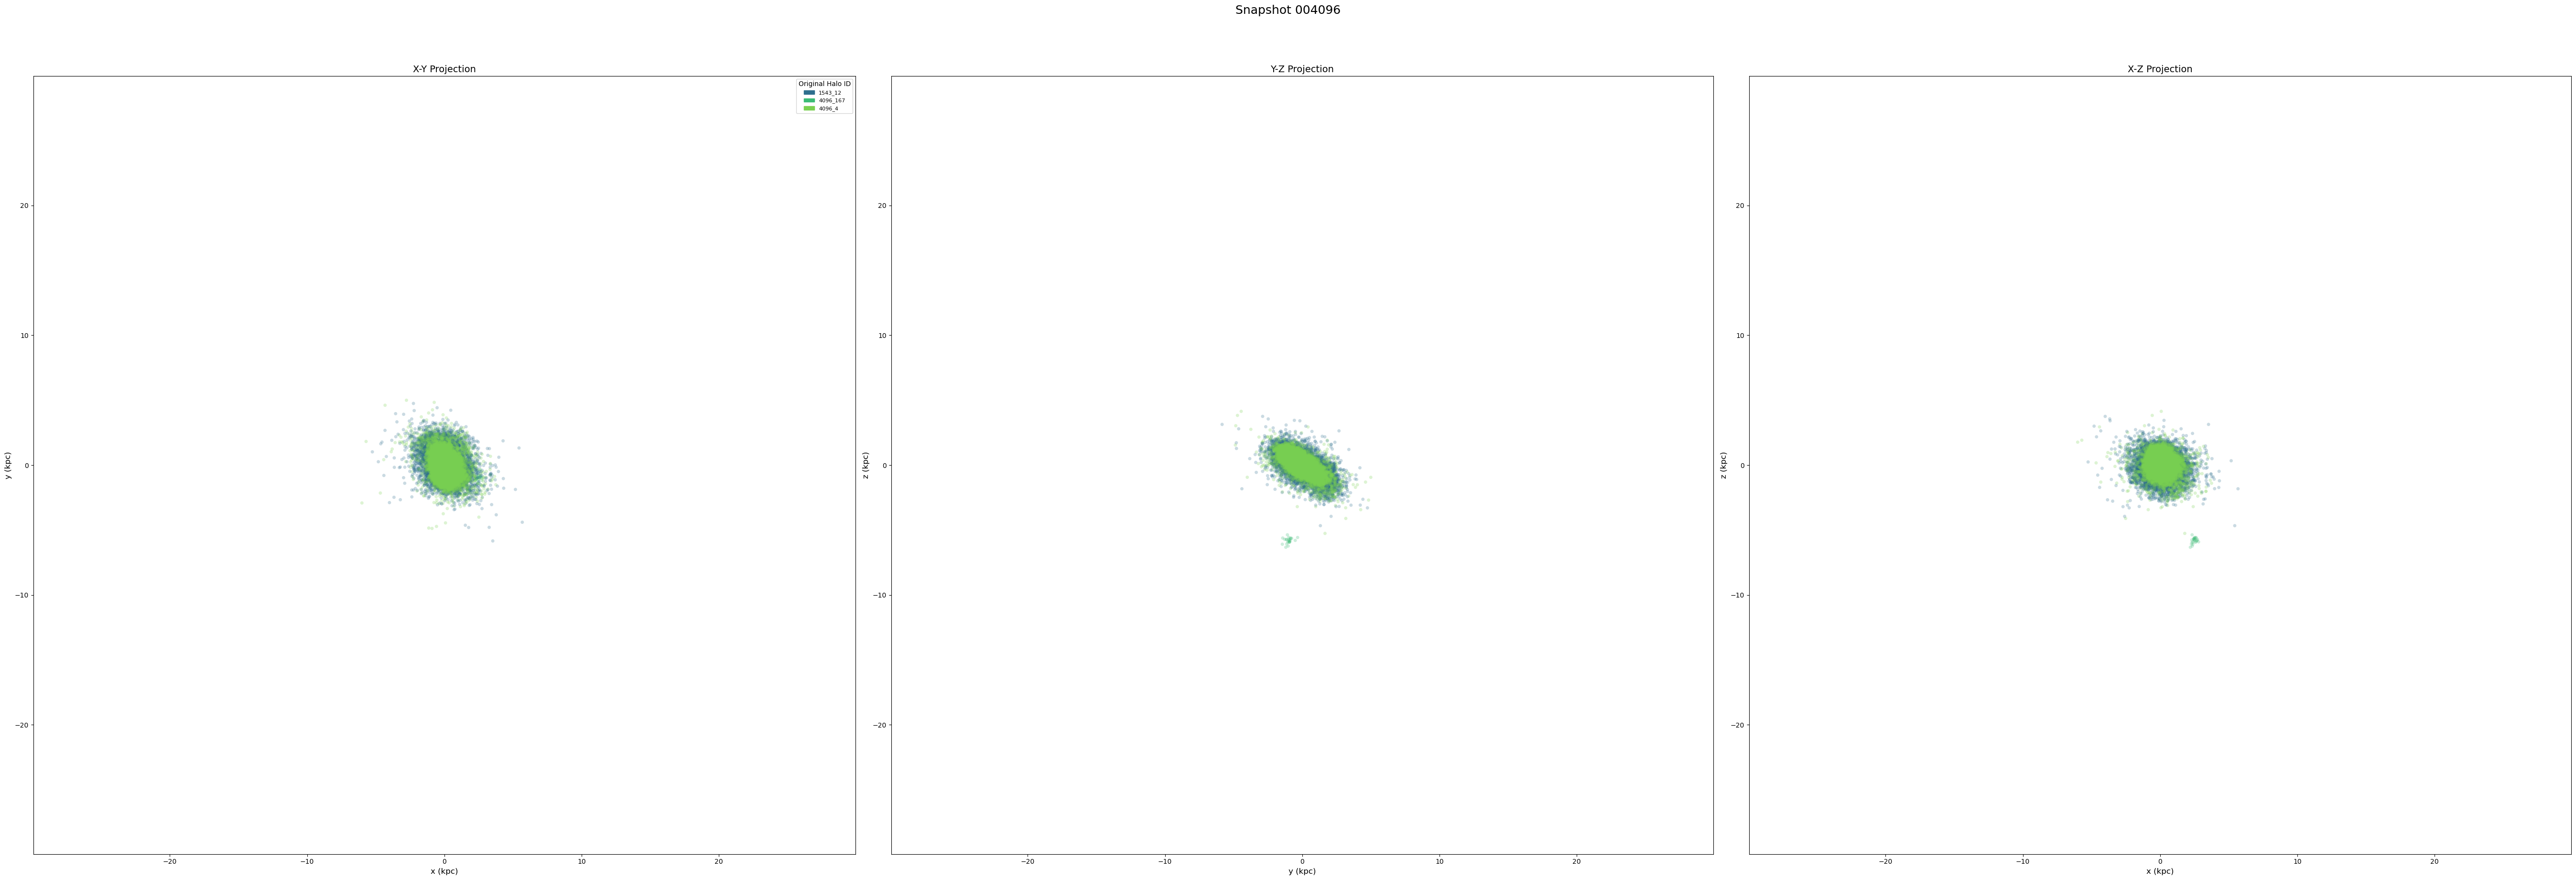

Saving plot to /home/selvani/MAP/pynbody/stellarhalo_trace_aw/merge_plots/4zoom/cptmarvel.4096g5HbwK1BH_bn_4_004096.png


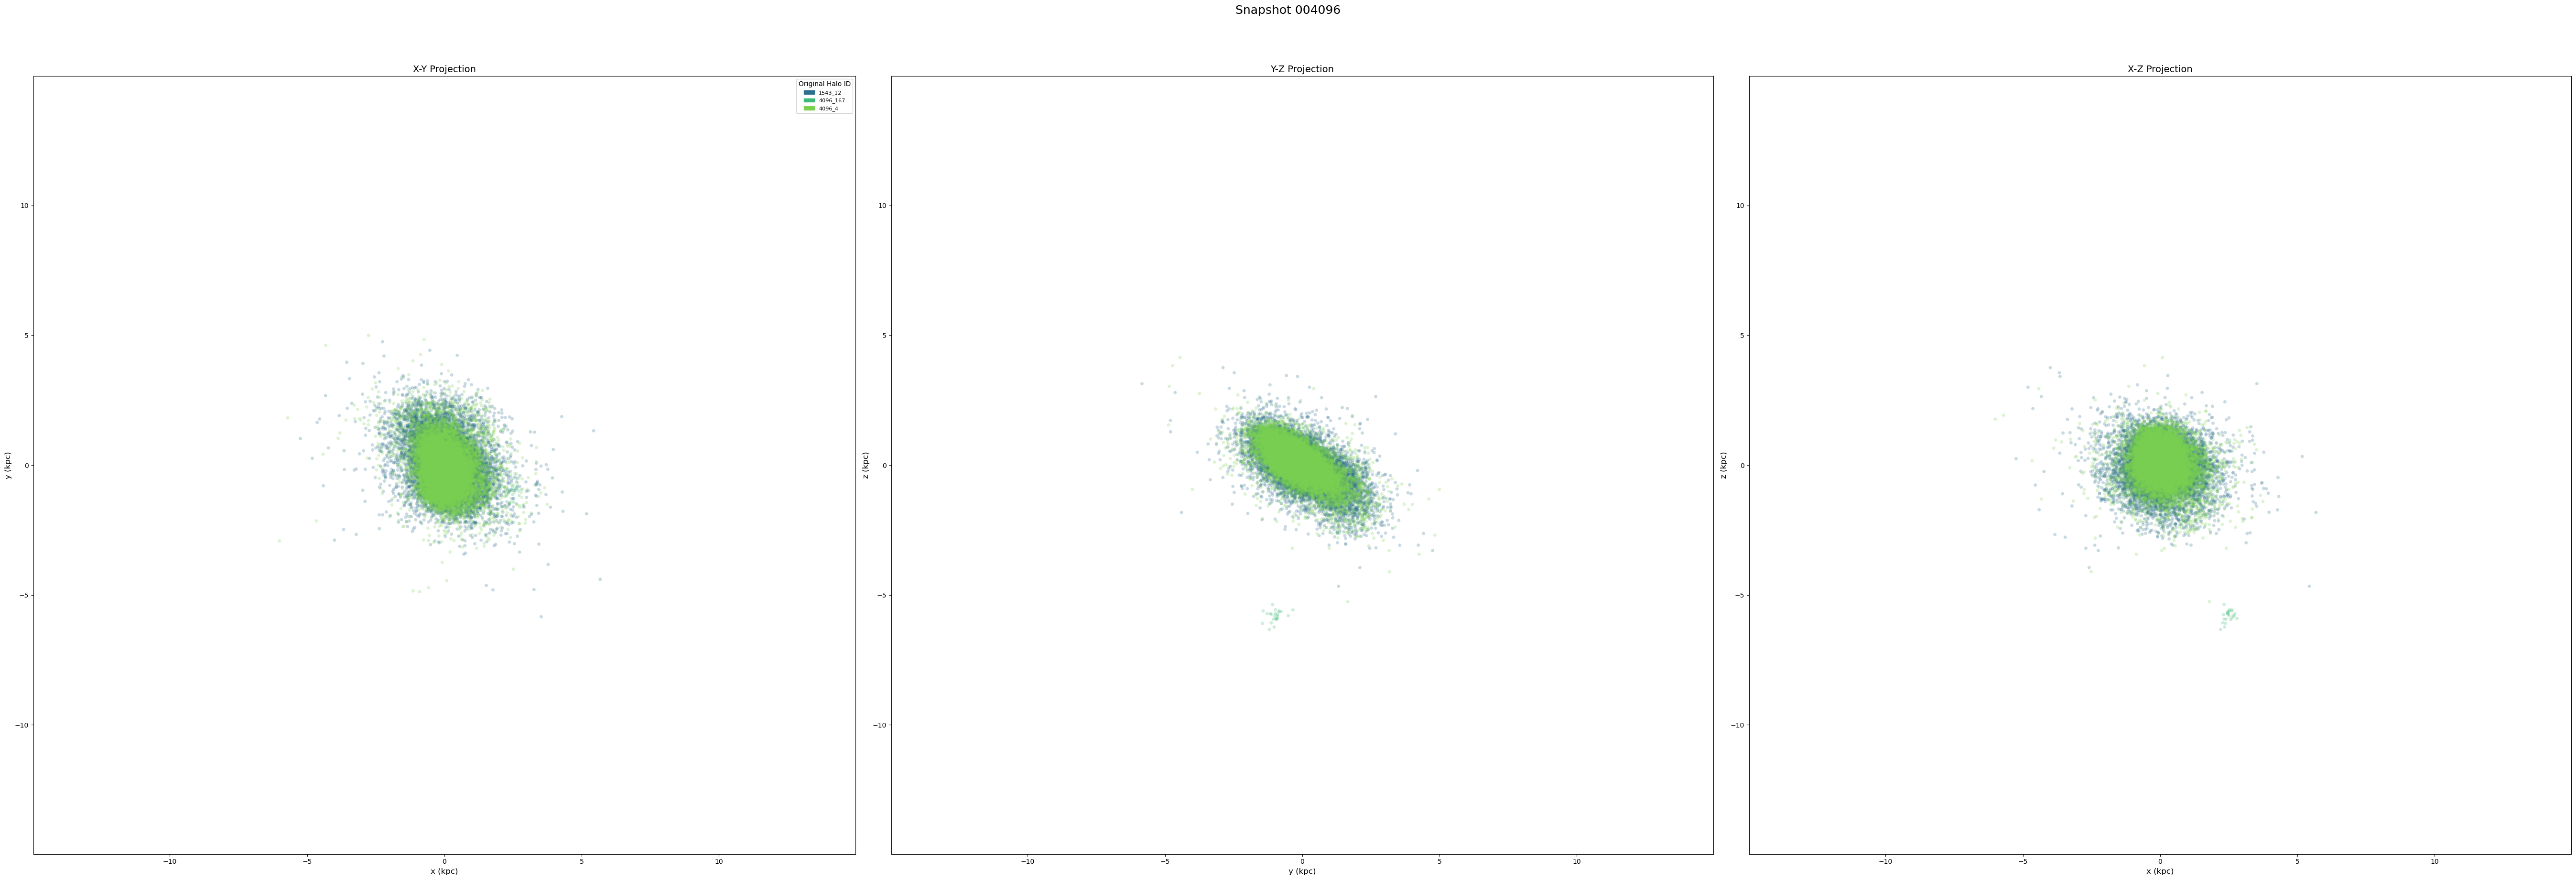

Saving plot to /home/selvani/MAP/pynbody/stellarhalo_trace_aw/merge_plots/4morezoom/cptmarvel.4096g5HbwK1BH_bn_4_004096.png


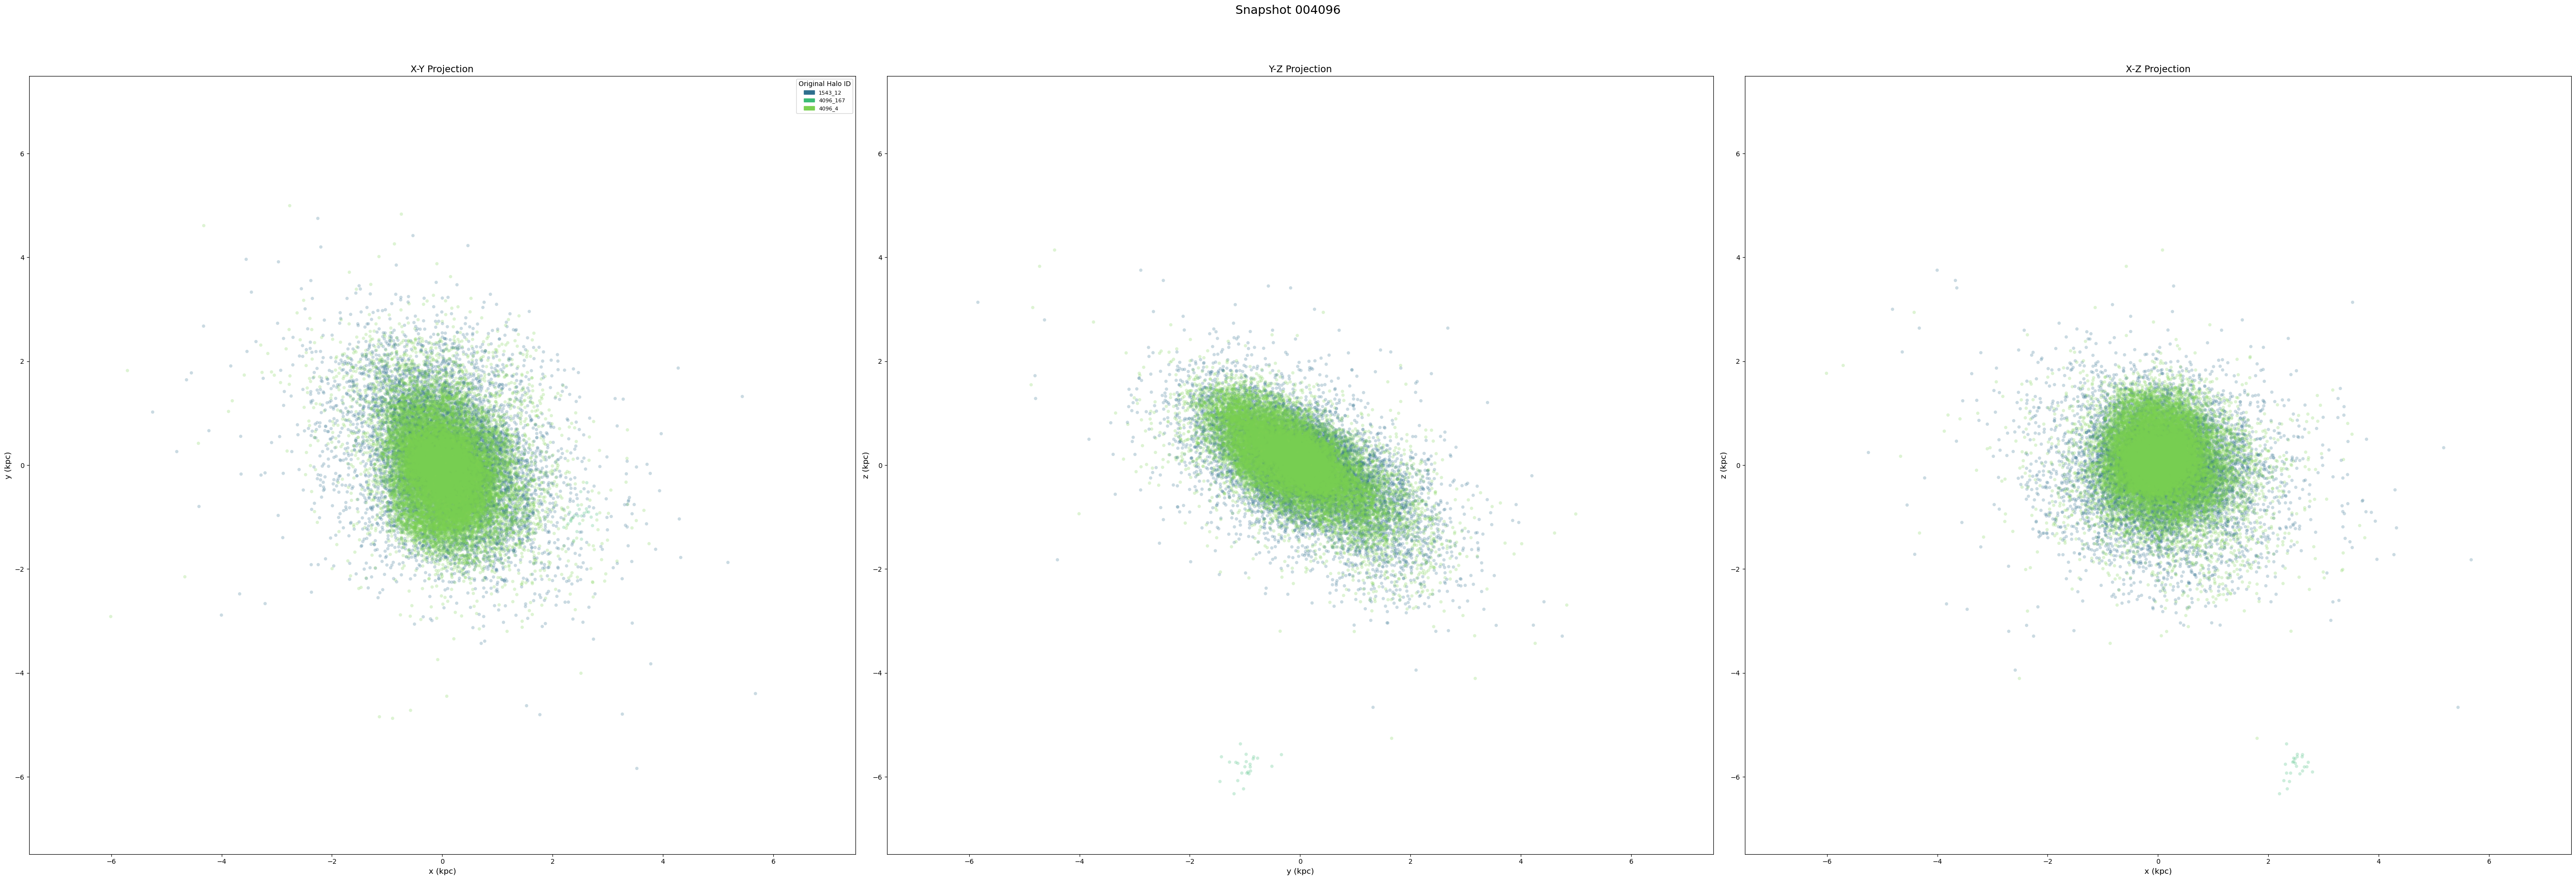

Now on 003968


In [ ]:
halo = halos_stars_dict[all_timesteps[-1].extension[-6:]][num]
halo_numbers, dbids = halo.calculate_for_progenitors("halo_number()", "dbid()")
snapshots = [db.get_halo(dbid).timestep.extension[-6:] for dbid in dbids]
halo_snapshots_dict = {snapshot: halo_number for snapshot, halo_number in zip(snapshots, dbids)}
overwrite = True
save_bases = [os.path.join(outfile_dir, 'merge_plots', str(halo.halo_number)),
              os.path.join(outfile_dir, 'merge_plots', str(halo.halo_number)+'zoom' ),
              os.path.join(outfile_dir, 'merge_plots', str(halo.halo_number)+'morezoom')]
print(f"Saving plots to {save_bases[0]}")
for save_base in save_bases:
    if not os.path.exists(save_base):
        os.makedirs(save_base)
filename_base = ss_dir + '_' + str(halo.halo_number) + '_'

pbar = tqdm.tqdm(total=len(all_timesteps))
for i, timestep in enumerate(all_timesteps[::-1]):
    timestep = timestep.extension[-6:]
    s = pynbody.load(sim_base + sims + '.' + timestep)
    s.physical_units()
    # all_halos = db.get_timestep("cptmarvel.4096g5HbwK1BH_bn/%" + str(timestep)).halos.all()

    halo = db.get_halo(halo_snapshots_dict[timestep])  # Use the first halo for demonstration
    print("Now on",timestep)

    save_path = os.path.join(save_bases[0], filename_base + timestep + '.png')
    save_path2 = os.path.join(save_bases[1], filename_base + timestep + '.png')
    save_path3 = os.path.join(save_bases[2], filename_base + timestep + '.png')

    if not overwrite and (os.path.isfile(save_path) and os.path.isfile(save_path2) and os.path.isfile(save_path3)):
        print(f"File {save_path} already exists, skipping...")
        pbar.update(1)
        continue

    try:
        roughcen = halo['shrink_center']
    except:
        try:
            print('No shrink center on', timestep)
            h = s.halos(halo_numbers='v1')
            roughcen = pynbody.analysis.halo.shrink_sphere_center(h[halo.halo_number])
        except:
            print('Failed again, skipping...')
            continue

    if i == 0:
        rng = np.random.default_rng(num)
        uIDs_shuffled = rng.permutation(uIDs)
        print(uIDs_shuffled)
        colormap = make_colormap(uIDs)
        try:
            rad = halo['Rvir']
        except:
            rad = halo['max_radius']

    try:
        currad = halo['Rvir']
    except:
        currad = halo['max_radius']
    
    sp = s[pynbody.filt.Sphere(SimArray([rad], "kpc"), roughcen)].load_copy()
    sp.physical_units()
    sp['pos'] -= roughcen
    
    ns = len(sp.s)
    print(ns)

    mask = np.where(sp.s['amiga.grp'] == halo.halo_number)[0]
    mask = np.where(sp.s['amiga.grp'] == sp.s['amiga.grp'])[0] # dummy to ignore mask
    mask = sp.s['tform'] > 0 #! FROM ANNA'S CODE
    haloids = np.array([halo_particle_dict[part] for part in sp.s['iord'][mask]])
    print(len(sp.s[mask]))

    plot_halo_mergers(sp, mask, haloids, colormap, timestep, rad/np.sqrt(2), save_path) # scale standard
    plot_halo_mergers(sp, mask, haloids, colormap, timestep, currad/(np.sqrt(2)*2), save_path2) # zoomin
    plot_halo_mergers(sp, mask, haloids, colormap, timestep, currad/(np.sqrt(2)*4), save_path3) # more zoomed
    pbar.update(1)

In [217]:
halo2 = halos_stars_dict['001152'][2]

In [218]:
halo2['shrink_center']

array([ 331.50934576, -195.28670203,  276.54512872])

In [219]:
halo2['Xc'], halo2['Yc'], halo2['Zc']

(9794.3853551, 8730.6578682, 9683.37700213)

In [214]:
halo2.load().physical_units()

In [228]:
# Get the snapshot to access cosmological parameters
snap = halo.timestep.load()

# Get cosmological parameters
h_param = getattr(snap.properties, 'h', 0.7)
scale_factor = getattr(snap.properties, 'a', 1.0/(1.0 + halo.timestep.redshift))
boxsize = snap.properties.get('boxsize', 50000)  # Default 50 Mpc/h
print(f"Scale factor: {scale_factor}, Box size: {boxsize}, h_param: {h_param}")
# Calculate box center (assuming boxsize is in kpc/h comoving)
# if hasattr(boxsize, 'in_units'):
#     boxcen = boxsize.in_units('kpc a') / 2.0
# else:
boxsize = float(boxsize)
boxcen = boxsize / 2.0
print(f"Box center: {boxcen} kpc/h comoving")

# Get raw coordinates
x_org = halo['Xc']
y_org = halo['Yc'] 
z_org = halo['Zc']

# Convert following the pynbody method you showed earlier
x = (x_org / h_param - boxcen) * scale_factor
y = (y_org / h_param - boxcen) * scale_factor
z = (z_org / h_param - boxcen) * scale_factor

print(f"Converted coordinates: x={x}, y={y}, z={z}")

Scale factor: 0.33343009796553474, Box size: 8.34e+03 kpc, h_param: 0.7
Box center: 4167.876224569184 kpc/h comoving
Converted coordinates: x=2790.2039717535877, y=3031.658881408056, z=3185.810329836507


In [238]:
halo

<Halo 'cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.001025/halo_6' | NDM=273680 Nstar=5082 Ngas=88980>

In [240]:
s = pynbody.load(sim_base + sims + '.' + halo.timestep.extension[-6:])
s.physical_units()

In [241]:
halos = s.halos(halo_numbers='v1')
halo2new = halos[halo.halo_number]

pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor


In [242]:
import pynbody.analysis.halo
center = pynbody.analysis.halo.shrink_sphere_center(halo2new)
print(f"Pynbody center: {center}")  # Should match shrink_center

ZeroDivisionError: float division

In [233]:
halo2['shrink_center']

array([ 331.50934576, -195.28670203,  276.54512872])

In [210]:
halo2['Xc'], halo2['Yc'], halo2['Zc']

(8116.03229889, 8107.22304862, 9633.63900271)

In [195]:
# Get comoving coordinates and convert to physical
xc_physical = halo2['Xc'] / (1 + halo2.timestep.redshift)  # Convert from comoving to physical
yc_physical = halo2['Yc'] / (1 + halo2.timestep.redshift)
zc_physical = halo2['Zc'] / (1 + halo2.timestep.redshift)

print(f"Physical coordinates: [{xc_physical}, {yc_physical}, {zc_physical}]")

Physical coordinates: [8713.387453714282, 8585.757585172463, 9974.244894782267]


In [191]:
halo2.all_properties

[<HaloProperty shrink_center (array) of <Halo 4 of ...>>,
 <HaloProperty max_radius=5.82e+01 of <Halo 4 of ...>>,
 <HaloProperty Mvir=8.28e+09 of <Halo 4 of ...>>,
 <HaloProperty Rvir=4.24e+01 of <Halo 4 of ...>>,
 <HaloProperty Xc=8.71e+03 of <Halo 4 of ...>>,
 <HaloProperty Yc=8.59e+03 of <Halo 4 of ...>>,
 <HaloProperty Zc=9.97e+03 of <Halo 4 of ...>>,
 <HaloProperty VXc=3.06e+00 of <Halo 4 of ...>>,
 <HaloProperty VYc=-5.74e+01 of <Halo 4 of ...>>,
 <HaloProperty VZc=2.55e+01 of <Halo 4 of ...>>,
 <HaloProperty Vmax=3.46e+01 of <Halo 4 of ...>>,
 <HaloProperty fMhires=1.00e+00 of <Halo 4 of ...>>,
 <HaloProperty M_gas=3.74e+08 of <Halo 4 of ...>>,
 <HaloProperty M_star=6.21e+06 of <Halo 4 of ...>>,
 <HaloProperty n_gas=367221 of <Halo 4 of ...>>,
 <HaloProperty n_star=31452 of <Halo 4 of ...>>,
 <HaloProperty n_dm=1624243 of <Halo 4 of ...>>,
 <HaloProperty npart=2022916 of <Halo 4 of ...>>]

In [176]:
halo.all_properties

[<HaloProperty Mvir=1.42e+09 of <Halo 6 of ...>>,
 <HaloProperty Rvir=3.01e+01 of <Halo 6 of ...>>,
 <HaloProperty Xc=8.78e+03 of <Halo 6 of ...>>,
 <HaloProperty Yc=9.28e+03 of <Halo 6 of ...>>,
 <HaloProperty Zc=9.61e+03 of <Halo 6 of ...>>,
 <HaloProperty VXc=-8.66e+00 of <Halo 6 of ...>>,
 <HaloProperty VYc=-4.54e+01 of <Halo 6 of ...>>,
 <HaloProperty VZc=3.22e+01 of <Halo 6 of ...>>,
 <HaloProperty Vmax=2.61e+01 of <Halo 6 of ...>>,
 <HaloProperty fMhires=1.00e+00 of <Halo 6 of ...>>,
 <HaloProperty M_gas=9.10e+07 of <Halo 6 of ...>>,
 <HaloProperty M_star=1.04e+06 of <Halo 6 of ...>>,
 <HaloProperty n_gas=88980 of <Halo 6 of ...>>,
 <HaloProperty n_star=5082 of <Halo 6 of ...>>,
 <HaloProperty n_dm=273680 of <Halo 6 of ...>>,
 <HaloProperty npart=367742 of <Halo 6 of ...>>]

### Separate

In [ ]:
timestep = '004096'
s = pynbody.load(sim_base + sims + '.' + timestep)
s.physical_units()
db.get_timestep("cptmarvel.4096g5HbwK1BH_bn/%" + str(int(timestep)))


<Halo 'cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/halo_2' | NDM=1809471 Nstar=55462 Ngas=531508>
55462


In [83]:
halo = halos_stars_dict[timestep][2]  # Use the first halo for demonstration
print(halo)

roughcen = halo['shrink_center']
try:
    rad = halo['Rvir']
except:
    rad = halo['max_radius']

sp = s[pynbody.filt.Sphere(SimArray([rad/2], "kpc"), roughcen)].load_copy()
sp.physical_units()
sp['pos'] -= roughcen
ns = len(sp.s)
print(ns)

<Halo 'cptmarvel.4096g5HbwK1BH_bn/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/halo_4' | NDM=1624243 Nstar=31452 Ngas=367221>
31452


In [ ]:
mask = np.where(sp.s['amiga.grp'] == halo.halo_number)[0]
# mask = np.where(sp.s['amiga.grp'] == sp.s['amiga.grp'])[0] # dummy to ignore mask

In [100]:
haloids = [halo_particle_dict[part] for part in sp.s['iord'][mask]]

In [102]:
len(sp.s[mask])

31452

In [103]:
np.unique(haloids)

array(['1543_12', '1920_17', '2048_29', '4096_167', '4096_4'], dtype='<U8')

/tmp/ipykernel_34615/3009069707.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', num_unique_halos)


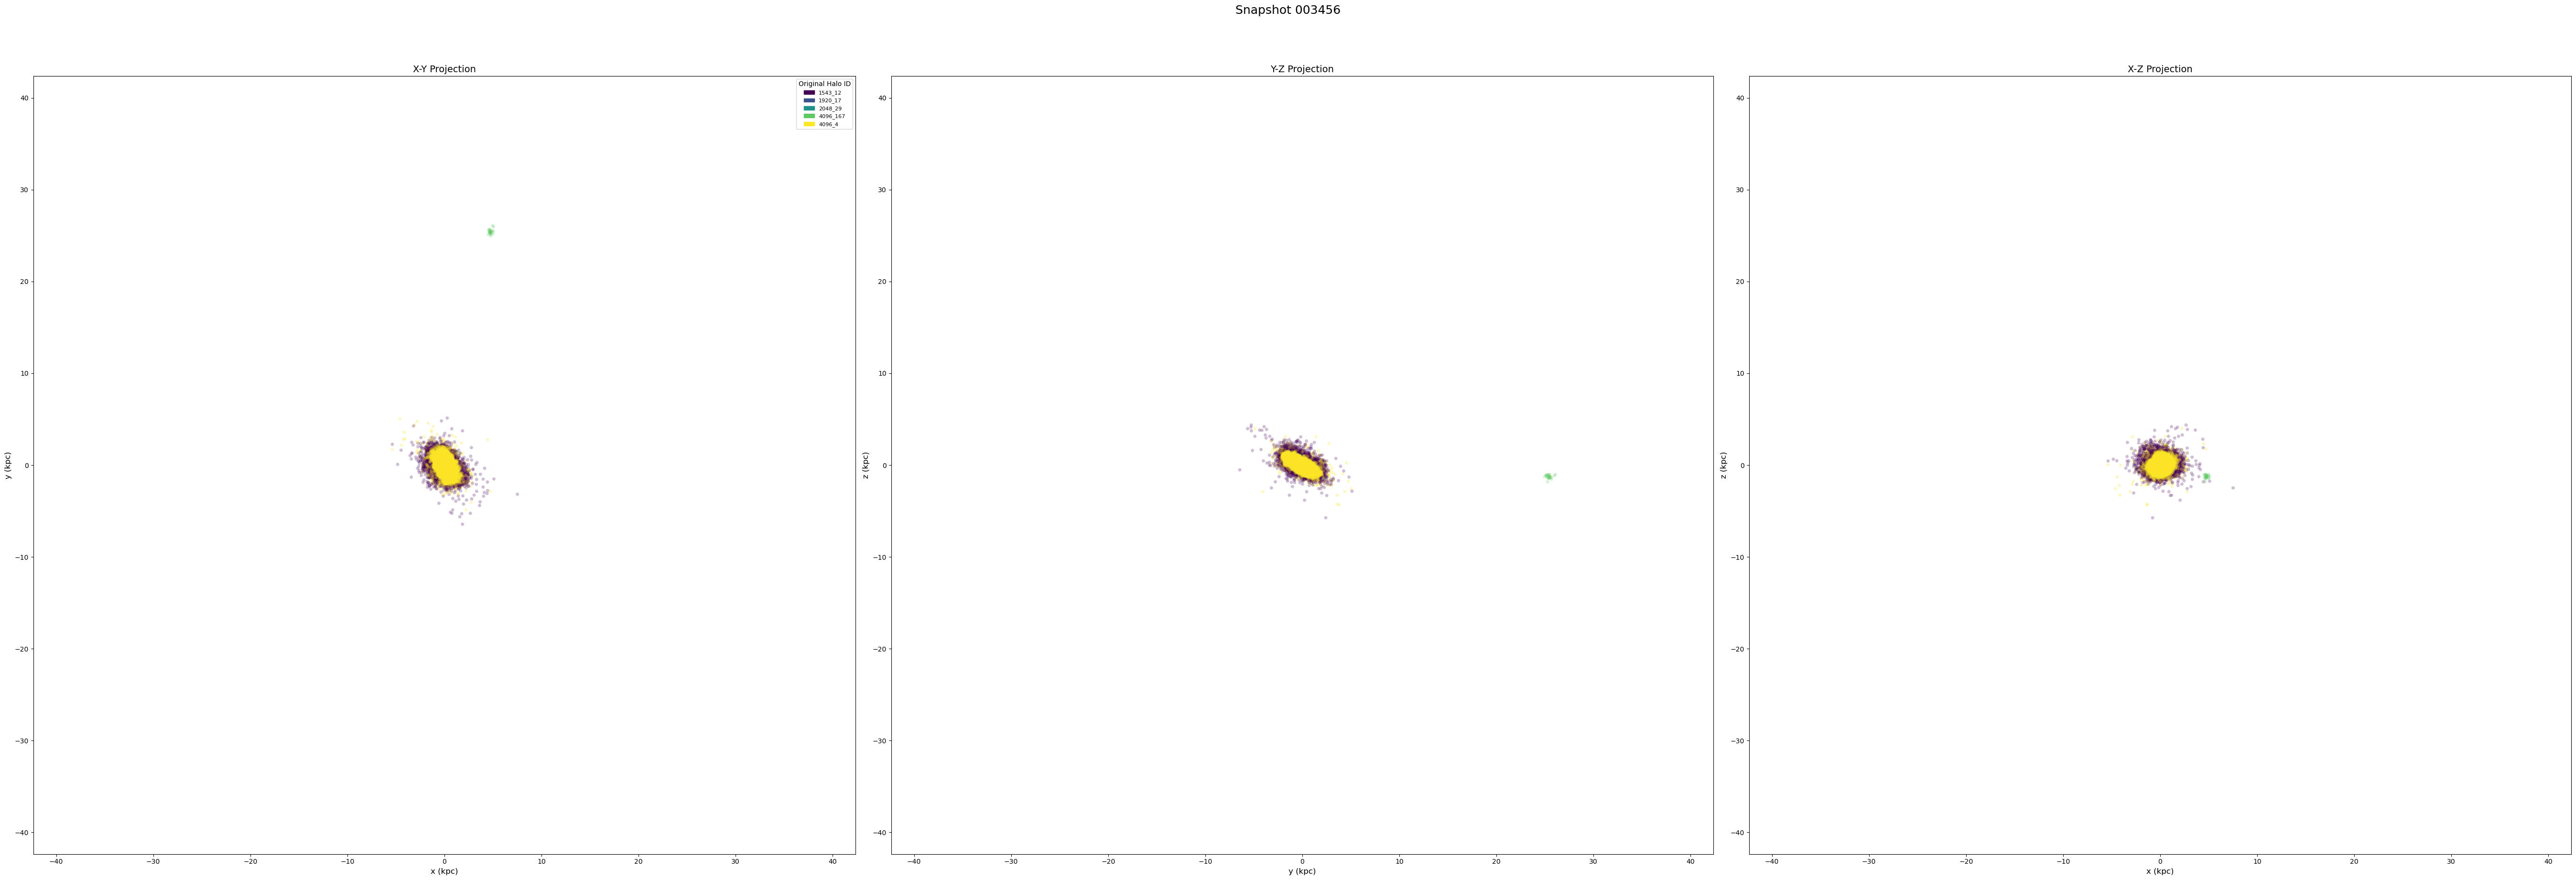

In [157]:
import numpy as np

# Ensure haloids is a numpy array for efficient processing
haloids = np.array(haloids)

# 1. Find the unique halo IDs to create a color mapping
unique_haloids = np.unique(haloids)

# 2. Create a color map that assigns a unique color to each halo ID.
#    Using a qualitative colormap like 'tab20' is good for distinct categories.
num_unique_halos = len(unique_haloids)
# Use a robust colormap that can handle many categories
if num_unique_halos <= 10:
    colors = plt.cm.get_cmap('viridis', num_unique_halos)
else:
    # For more than 20 halos, 'viridis' or 'plasma' can work, though colors may be less distinct
    colors = plt.cm.get_cmap('viridis', num_unique_halos)
    
color_map = {hid: colors(i) for i, hid in enumerate(unique_haloids)}

# 3. Create an array of colors for each star particle
particle_colors = [color_map[hid] for hid in haloids]

# 4. Create the scatter plot
fig, axes = plt.subplots(1, 3, figsize=(54, 18))

# Define projections
projections = [
    {'ax': axes[0], 'dims': [0, 1], 'labels': ['x (kpc)', 'y (kpc)'], 'title': 'X-Y Projection'},
    {'ax': axes[1], 'dims': [1, 2], 'labels': ['y (kpc)', 'z (kpc)'], 'title': 'Y-Z Projection'},
    {'ax': axes[2], 'dims': [0, 2], 'labels': ['x (kpc)', 'z (kpc)'], 'title': 'X-Z Projection'}
]

pos_data = sp.s['pos'][mask]

for proj in projections:
    ax = proj['ax']
    dim1 = proj['dims'][0]
    dim2 = proj['dims'][1]

    ax.scatter(
        pos_data[:, dim1], 
        pos_data[:, dim2],
        c=particle_colors,
        s=25.0,  # Very small marker size for many points
        alpha=0.25, # Use transparency to see overlapping structures
        edgecolors='none' # Remove marker edges for a cleaner look
    )

    ax.set_title(proj['title'], fontsize=14)
    ax.set_xlabel(proj['labels'][0], fontsize=12)
    ax.set_ylabel(proj['labels'][1], fontsize=12)

    if rad:
        ax.set_xlim(-rad, rad)
        ax.set_ylim(-rad, rad)

legend_patches = [mpatches.Patch(color=color_map[hid], label=hid) for hid in unique_haloids]
# Display the legend
if num_unique_halos <= 20:
    axes[0].legend(handles=legend_patches, title="Original Halo ID", loc='upper right', fontsize=8)
else:
    print(f"Warning: {num_unique_halos} unique halos found. Legend will not be displayed to avoid clutter.")

fig.suptitle(f"Snapshot {timestep}", fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
# 6. Set plot titles and labels
# plt.title("Stellar Positions Colored by Original Halo", fontsize=16)
# plt.xlabel("x (kpc)", fontsize=12)
# plt.ylabel("y (kpc)", fontsize=12)
# plt.xlim(-rad, rad)
# plt.ylim(-rad, rad)
# plt.gca().set_aspect('equal', adjustable='box') # Ensure x and y axes have the same scale
# plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
import numpy as np

# Ensure haloids is a numpy array for efficient processing
haloids = np.array(haloids)

# 1. Find the unique halo IDs to create a color mapping
unique_haloids = np.unique(haloids)

# 2. Create a color map that assigns a unique color to each halo ID.
#    Using a qualitative colormap like 'tab20' is good for distinct categories.
num_unique_halos = len(unique_haloids)
# Use a robust colormap that can handle many categories
if num_unique_halos <= 10:
    colors = plt.cm.get_cmap('viridis', num_unique_halos)
else:
    # For more than 20 halos, 'viridis' or 'plasma' can work, though colors may be less distinct
    colors = plt.cm.get_cmap('viridis', num_unique_halos)
    
color_map = {hid: colors(i) for i, hid in enumerate(unique_haloids)}

# 3. Create an array of colors for each star particle
particle_colors = [color_map[hid] for hid in haloids]

# 4. Create the scatter plot
plt.figure(figsize=(18, 18))
plt.scatter(
    sp.s['pos'][mask][:, 0], 
    sp.s['pos'][mask][:, 1],
    c=particle_colors,
    s=25.0,  # Very small marker size for many points
    alpha=0.25, # Use transparency to see overlapping structures
    edgecolors='none' # Remove marker edges for a cleaner look
)

legend_patches = [mpatches.Patch(color=color_map[hid], label=hid) for hid in unique_haloids]
# Display the legend
if num_unique_halos <= 20:
    plt.legend(handles=legend_patches, title="Original Halo ID", loc='upper right', fontsize=8)
else:
    print(f"Warning: {num_unique_halos} unique halos found. Legend will not be displayed to avoid clutter.")

# 6. Set plot titles and labels
plt.title("Stellar Positions Colored by Original Halo", fontsize=16)
plt.xlabel("x (kpc)", fontsize=12)
plt.ylabel("y (kpc)", fontsize=12)
plt.xlim(-rad, rad)
plt.ylim(-rad, rad)
plt.gca().set_aspect('equal', adjustable='box') # Ensure x and y axes have the same scale
# plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

TypeError: ColormapRegistry.get_cmap() takes 2 positional arguments but 3 were given

In [59]:
sp.s.all_keys()

['HII',
 'HeIII',
 'ne',
 'hetot',
 'hydrogen',
 'feh',
 'oxh',
 'ofe',
 'mgfe',
 'nefe',
 'sife',
 'c_s',
 'c_s_turb',
 'mjeans',
 'mjeans_turb',
 'ljeans',
 'ljeans_turb',
 'U_mag',
 'U_lum_den',
 'B_mag',
 'B_lum_den',
 'V_mag',
 'V_lum_den',
 'R_mag',
 'R_lum_den',
 'I_mag',
 'I_lum_den',
 'J_mag',
 'J_lum_den',
 'H_mag',
 'H_lum_den',
 'K_mag',
 'K_lum_den',
 'u_mag',
 'u_lum_den',
 'g_mag',
 'g_lum_den',
 'r_mag',
 'r_lum_den',
 'i_mag',
 'i_lum_den',
 'z_mag',
 'z_lum_den',
 'y_mag',
 'y_lum_den',
 'r',
 'rxy',
 'vr',
 'v2',
 'vt',
 'ke',
 'te',
 'j',
 'j2',
 'jz',
 'vrxy',
 'vcxy',
 'vphi',
 'vtheta',
 'v_mean',
 'v_disp',
 'v_curl',
 'vorticity',
 'v_div',
 'age',
 'theta',
 'alt',
 'az',
 'cs',
 'mu',
 'p',
 'u',
 'temp',
 'zeldovich_offset',
 'aform',
 'tform',
 'iord_argsort',
 'smooth',
 'rho',
 'phi',
 'metals',
 'pos',
 'vel',
 'eps',
 'mass',
 'tform']

/tmp/ipykernel_34615/547441235.py:5: MatplotlibDeprecationWarning: Passing label as a length 205466 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(


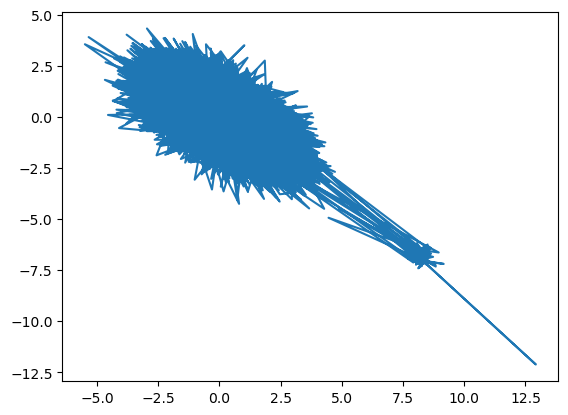

In [56]:
#show the movement of each halo's COM
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.plot(
    sp.s['pos'][:, 0], sp.s['pos'][:, 1],label=haloids)

# fig= plt.figure(figsize=(12,9))
# ax=fig.add_subplot(111, projection='3d')

# ax.plot(sp.s['pos'][:, 0], sp.s['pos'][:, 1], sp.s['pos'][:, 2], label=haloids)

# ax.set_xlabel("x(kpc)")
# ax.set_ylabel("y(kpc)")
# ax.set_zlabel("z(kpc)")

# ax.set_title("Movement of COM")
# ax.legend()
#plt.grid(True)
# plt.savefig('Movement_COM.png')
plt.show()